# ${Brute}$ ${Force}$算法

## 算法介绍

> **Brute Force算法**简称BF算法。中文意思是暴力匹配算法，也可以叫做朴素匹配算法。   
> 
> **BF算法思想**：对于给定的文本串$T$和模式串$p$，从文本串和模式串的第一个字符开始比较，如果相等则继续比较后续字符，否则从上次匹配开始位置的下一个字符位置重新开始比较。直到模式串中的每一个字符依次和文本串的某一个连续子串相等，则模式匹配成功，否则失败。

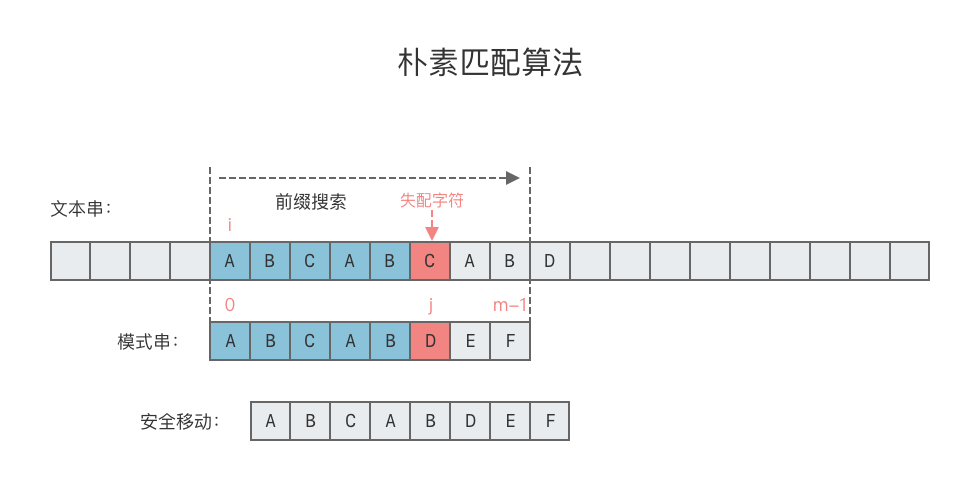

## 算法步骤

1. 求出给定的文本串$T$和模式串$p$的长度$n, m$。
2. 同时遍历$T$和$p$，从$T[0]$和$p[0]$开始。
    - 如果相等，则继续比较下一个字符，以此类推直到模式串p的尾端$p[m-1]$。
    - 如果不相等，则将文本串$T$ 移动到上次匹配开始位置的下一个字符位置，模式串$p$则回退到首端，再依次进行比较。
3. 当遍历完模式串$p$或文本串在$T$的时候停止搜索。

## 实现代码

In [ ]:
def bruteForce(T: str, p: str) -> int:
    n, m = len(T), len(p)
    i, j = 0, 0             # i 表示文本串 T 的当前位置，j 表示模式串 p 的当前位置
    while i < n or j < m:   # i 或 j 其中一个到达尾部时停止搜索
        if T[i] == p[j]:    # 如果相等，则继续进行下一个字符匹配
            i += 1
            j += 1
        else:
            i = i - j + 1   # 如果匹配失败则将 i 移动到上次匹配开始位置的下一个位置
            j = 0           # 匹配失败 j 回退到模式串开始位置
    if j == m:
        return i - j        # 匹配成功，返回匹配的开始位置
    if i == n:
        return -1           # 匹配失败，返回 -1

## 算法分析

BF 算法非常简单，容易理解，但其效率很低。主要是因为在匹配过程中可能会出现回溯：当遇到一对字符不同时，模式串 $p$ 直接回到开始位置，文本串也回到匹配开始位置的下一个位置，再重新开始比较。

在回溯之后，文本串和模式串中一些部分的比较是没有必要的。由于这种操作策略，导致 BF 算法的效率很低。最坏情况是每一趟比较都在模式串的最后遇到了字符不匹配的情况，每轮比较需要进行 $m$ 次字符对比，总共需要进行 $n - m + 1$ 轮比较，总的比较次数为 $m \times (n - m + 1) $。所以 BF 算法的最坏时间复杂度为 $O(m \times n)$。

在最理想的情况下（第一次匹配直接匹配成功），BF 算法的最佳时间复杂度是 $O(m)$。

在一般情况下，根据等概率原则，平均搜索次数为 $\frac{(n + m)}{2}$，所以 Brute Force 算法的平均时间复杂度为 $O(n + m)$。